In [50]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

In [51]:
data = pd.read_csv("../datasets/Comprehensive_Banking_Database.csv")

In [52]:
data.shape

(5000, 40)

In [53]:
data.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

In [55]:
def columns_info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
columns_info(data)

,Column,Unique Values,null values
0,Customer ID,5000,0
1,First Name,50,0
2,Last Name,50,0
3,Age,52,0
4,Gender,3,0
5,Address,5000,0
6,City,40,0
7,Contact Number,5000,0
8,Email,2139,0
9,Account Type,2,0


**===> Since it has not any null vlaues we not need to do imputation opeation instead we will remove some unnecessary features** 

In [56]:
## AS we have no use of this column we simply drop these columns..
data.drop(['Address','First Name','Last Name','Contact Number','Email','TransactionID','Branch ID','Loan ID','CardID','Feedback ID'], axis=1, inplace=True)

In [57]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'City', 'Account Type',
       'Account Balance', 'Date Of Account Opening', 'Last Transaction Date',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term', 'Approval/Rejection Date', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Payment Due Date',
       'Last Credit Card Payment Date', 'Rewards Points', 'Feedback Date',
       'Feedback Type', 'Resolution Status', 'Resolution Date', 'Anomaly'],
      dtype='object')

In [58]:
data.describe()

,Customer ID,Age,Account Balance,Transaction Amount,Account Balance After Transaction,Loan Amount,Interest Rate,Loan Term,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Anomaly
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,5060.570918,2508.501144,5037.418898,25501.042806,5.505038,36.520800,5549.035830,2487.40084,124.370134,4966.161800,0.880000
std,1443.520003,15.145672,2849.356481,1450.194986,4053.220017,14039.732628,2.629752,16.924315,2581.718105,1446.80295,72.340102,2901.410915,0.475021
min,1.000000,18.000000,107.200000,10.570000,-4878.760000,1006.370000,1.000000,12.000000,1007.000000,1.45000,0.070000,1.000000,-1.000000
25%,1250.750000,30.000000,2582.777500,1241.150000,2047.205000,13315.305000,3.200000,24.000000,3314.065000,1243.51750,62.180000,2475.250000,1.000000
50%,2500.500000,43.000000,5075.500000,2494.025000,5089.785000,25909.705000,5.520000,36.000000,5567.485000,2461.62000,123.080000,4950.500000,1.000000
75%,3750.250000,57.000000,7509.760000,3796.222500,8036.367500,37441.570000,7.832500,48.000000,7786.040000,3722.58000,186.125000,7483.250000,1.000000
max,5000.000000,69.000000,9998.110000,4998.390000,14911.380000,49993.490000,10.000000,60.000000,9997.780000,4997.11000,249.860000,9999.000000,1.000000


In [59]:
data.describe(include="object").T

,count,unique,top,freq
Gender,5000,3,Female,1727
City,5000,40,San Jose,163
Account Type,5000,2,Savings,2507
Date Of Account Opening,5000,3738,1/10/2001,5
Last Transaction Date,5000,365,1/23/2023,27
Transaction Date,5000,365,5/2/2023,25
Transaction Type,5000,3,Deposit,1698
Loan Type,5000,3,Mortgage,1712
Approval/Rejection Date,5000,1088,8/23/2020,12
Loan Status,5000,3,Approved,1710


https://www.kaggle.com/code/kdsharma/banking-churn-analysis-modeling

In [60]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'City', 'Account Type',
       'Account Balance', 'Date Of Account Opening', 'Last Transaction Date',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term', 'Approval/Rejection Date', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Payment Due Date',
       'Last Credit Card Payment Date', 'Rewards Points', 'Feedback Date',
       'Feedback Type', 'Resolution Status', 'Resolution Date', 'Anomaly'],
      dtype='object')

### let's analyze all categorical features

In [61]:
data['Account Type'].value_counts()

Account Type
Savings    2507
Current    2493
Name: count, dtype: int64

In [62]:
data['Transaction Type'].value_counts()

Transaction Type
Deposit       1698
Withdrawal    1673
Transfer      1629
Name: count, dtype: int64

In [63]:
data['Loan Type'].value_counts()

Loan Type
Mortgage    1712
Auto        1645
Personal    1643
Name: count, dtype: int64

In [64]:
data['Loan Term'].value_counts()

Loan Term
48    1037
60    1035
24    1004
36     981
12     943
Name: count, dtype: int64

In [65]:
data['Loan Status'].value_counts()

Loan Status
Approved    1710
Closed      1660
Rejected    1630
Name: count, dtype: int64

In [66]:
data['Card Type'].value_counts()

Card Type
MasterCard    1696
AMEX          1679
Visa          1625
Name: count, dtype: int64

In [67]:

data['Feedback Type'].value_counts()

Feedback Type
Suggestion    1689
Complaint     1681
Praise        1630
Name: count, dtype: int64

In [68]:

data['Resolution Status'].value_counts()

Resolution Status
Pending     2504
Resolved    2496
Name: count, dtype: int64

In [69]:
data['City'].value_counts()

City
San Jose            163
Indianapolis        152
San Francisco       148
Detroit             143
Tucson              138
Denver              138
Las Vegas           137
El Paso             133
Columbus            131
Washington          130
Jacksonville        129
Atlanta             129
Los Angeles         127
San Diego           126
Louisville          126
Memphis             126
New York            125
Nashville           125
Milwaukee           125
Mesa                125
Philadelphia        124
Houston             124
Colorado Springs    123
Dallas              123
Chicago             123
San Antonio         123
Charlotte           122
Seattle             122
Fort Worth          120
Kansas City         119
Portland            118
Oklahoma City       116
Baltimore           115
Boston              114
Phoenix             110
Austin              107
Sacramento          107
Omaha               106
Albuquerque         106
Fresno              102
Name: count, dtype: int64

In [70]:
## for better visual convert values into Yes and No
data['Anomaly'] = data['Anomaly'].replace({1 : 'Yes',-1:'No'})
data['Anomaly'].value_counts()

Anomaly
Yes    4700
No      300
Name: count, dtype: int64

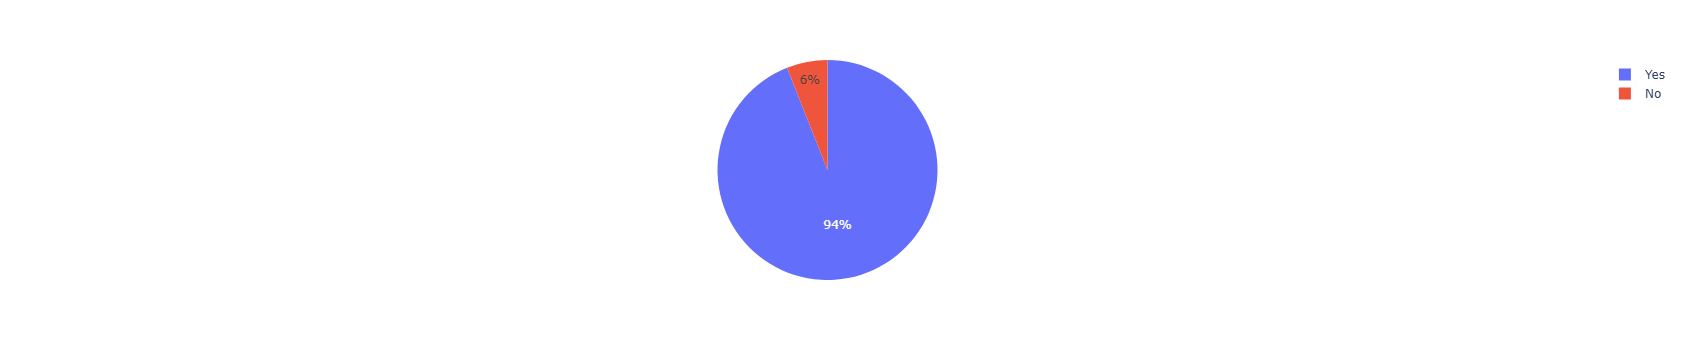

In [71]:
counts = data['Anomaly'].value_counts().rename_axis('Anomaly').reset_index(name='Count')
fig = px.pie(counts, values='Count', names='Anomaly')
fig.show()

**===> it has 94 % Anomaly retio so let's find what is reason behind it.**

In [72]:
anomaly_yes = data[data['Anomaly'] == 'Yes']
anomaly_yes

,Customer ID,Age,Gender,City,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,Transaction Date,Transaction Type,...,Credit Card Balance,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,45,Male,Fort Worth,Current,1313.38,5/26/2006,4/23/2023,12/7/2023,Withdrawal,...,4524.32,226.22,11/26/2023,3/20/2023,8142,10/6/2023,Suggestion,Resolved,1/22/2023,Yes
1,2,47,Female,Louisville,Current,5988.46,3/2/2006,1/27/2023,4/27/2023,Deposit,...,856.70,42.84,11/5/2023,6/16/2023,4306,4/7/2023,Complaint,Resolved,8/27/2023,Yes
2,3,25,Female,Philadelphia,Current,8277.88,7/19/2015,1/1/2023,4/5/2023,Deposit,...,3242.36,162.12,1/8/2023,3/20/2023,4842,9/7/2023,Praise,Pending,5/11/2023,Yes
3,4,52,Other,Oklahoma City,Savings,7487.21,1/30/2008,8/2/2023,7/28/2023,Withdrawal,...,4329.17,216.46,9/8/2023,10/15/2023,9463,5/28/2023,Complaint,Resolved,7/5/2023,Yes
4,5,68,Other,Phoenix,Savings,6993.55,5/25/2021,3/27/2023,1/16/2023,Transfer,...,25.72,1.29,3/4/2023,7/27/2023,2209,2/12/2023,Complaint,Resolved,11/21/2023,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,21,Other,Mesa,Savings,5564.12,3/12/2020,7/14/2023,11/29/2023,Withdrawal,...,2017.13,100.86,7/19/2023,2/10/2023,7530,4/12/2023,Complaint,Pending,1/23/2023,Yes
4996,4997,27,Female,Los Angeles,Savings,2625.13,5/19/2011,3/21/2023,7/7/2023,Deposit,...,853.33,42.67,2/16/2023,12/24/2023,8796,9/7/2023,Complaint,Pending,9/17/2023,Yes
4997,4998,45,Female,Louisville,Current,2732.76,12/2/2011,3/9/2023,1/25/2023,Withdrawal,...,228.49,11.42,2/23/2023,9/6/2023,9966,10/23/2023,Suggestion,Resolved,2/5/2023,Yes
4998,4999,58,Female,Detroit,Current,3006.01,5/14/2000,5/17/2023,9/27/2023,Deposit,...,325.37,16.27,9/8/2023,1/12/2023,538,5/20/2023,Complaint,Pending,3/3/2023,Yes


**===> all key features has same values of anomaly so we cannnot figure out which is most contributor feature for anomaly. this is because this dataset is synthetic and created** 

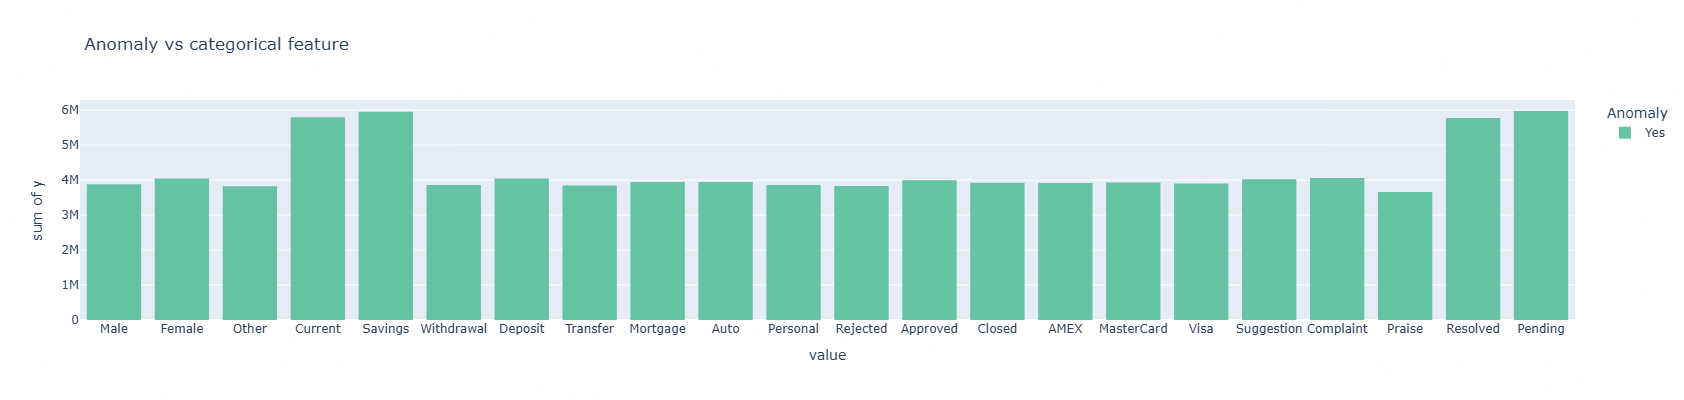

In [73]:
feature = ['Gender','Account Type','Transaction Type','Loan Type','Loan Status','Card Type','Feedback Type','Resolution Status']

fig = px.histogram(anomaly_yes, x=feature,y=anomaly_yes['Customer ID'].unique(),  color='Anomaly',
                           color_discrete_sequence=px.colors.qualitative.Set2,
                           title=f"Anomaly vs categorical feature")
fig.update_layout(bargap=0.2, height=400)
fig.show()

In [74]:
anomaly_yes[feature].count()

Gender               4700
Account Type         4700
Transaction Type     4700
Loan Type            4700
Loan Status          4700
Card Type            4700
Feedback Type        4700
Resolution Status    4700
dtype: int64

In [75]:

def countplot(column):
    counts = data.groupby([column, 'Anomaly'],observed=True).size().reset_index(name='Count')
   
    total = counts['Count'].sum()
    counts['Percentage'] = (counts['Count'] / total * 100).round(1).astype(str) + '%'

    fig = px.bar(
        counts,
        x=column,
        y='Count',
        color='Anomaly',
        barmode='group',
        text='Percentage',
        color_discrete_sequence=px.colors.qualitative.Set2,
        title=f"Customer Anomaly by {column}"
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        title_font_size=20,
        xaxis_title=column,
        yaxis_title='Count',
        bargap=0.2,
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        height=500,
        width = 800
    )
    fig.show()


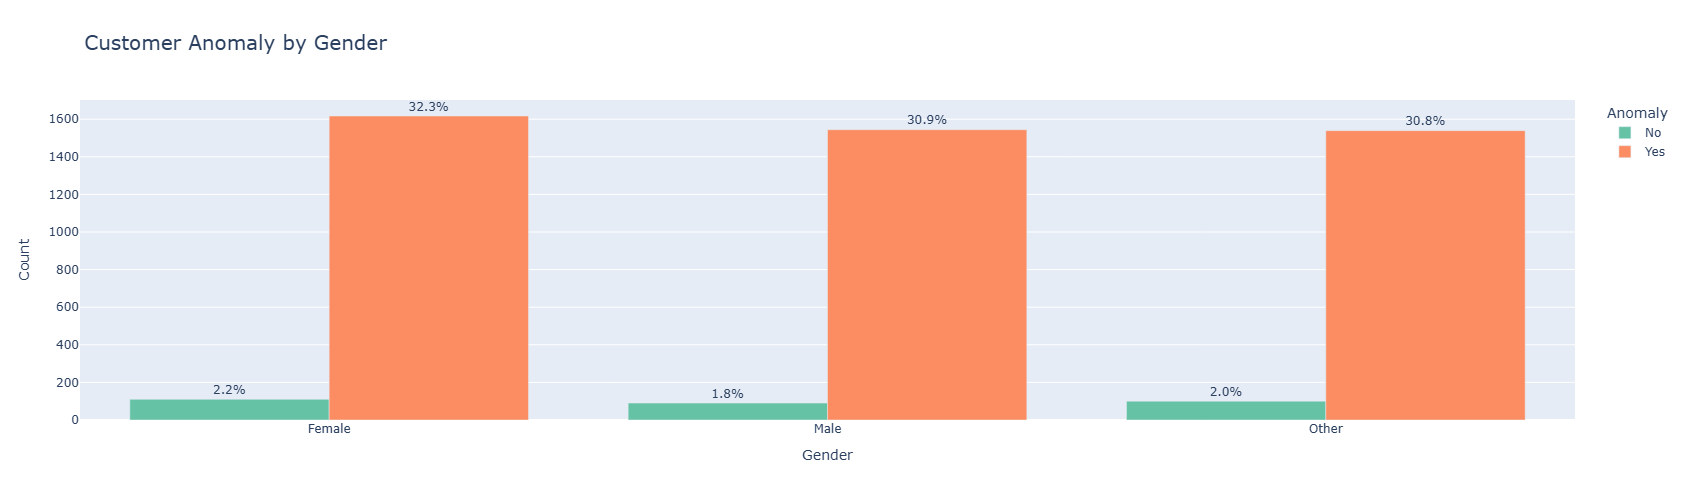

In [76]:
countplot('Gender')

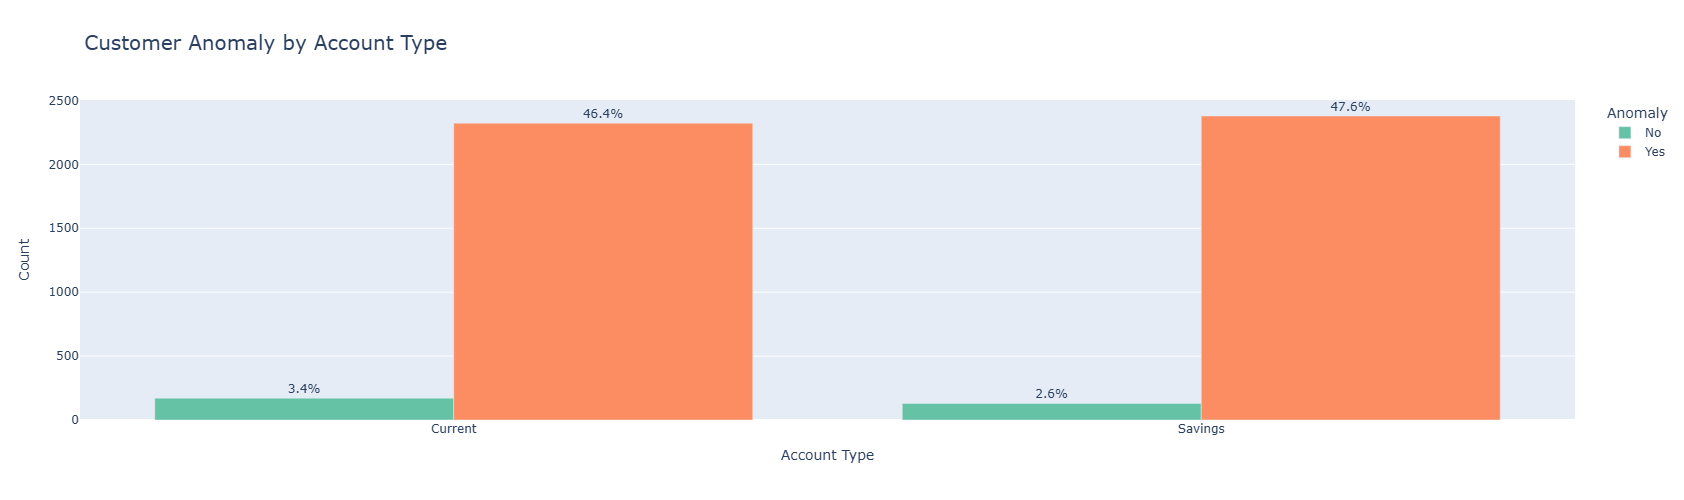

In [77]:
countplot('Account Type')

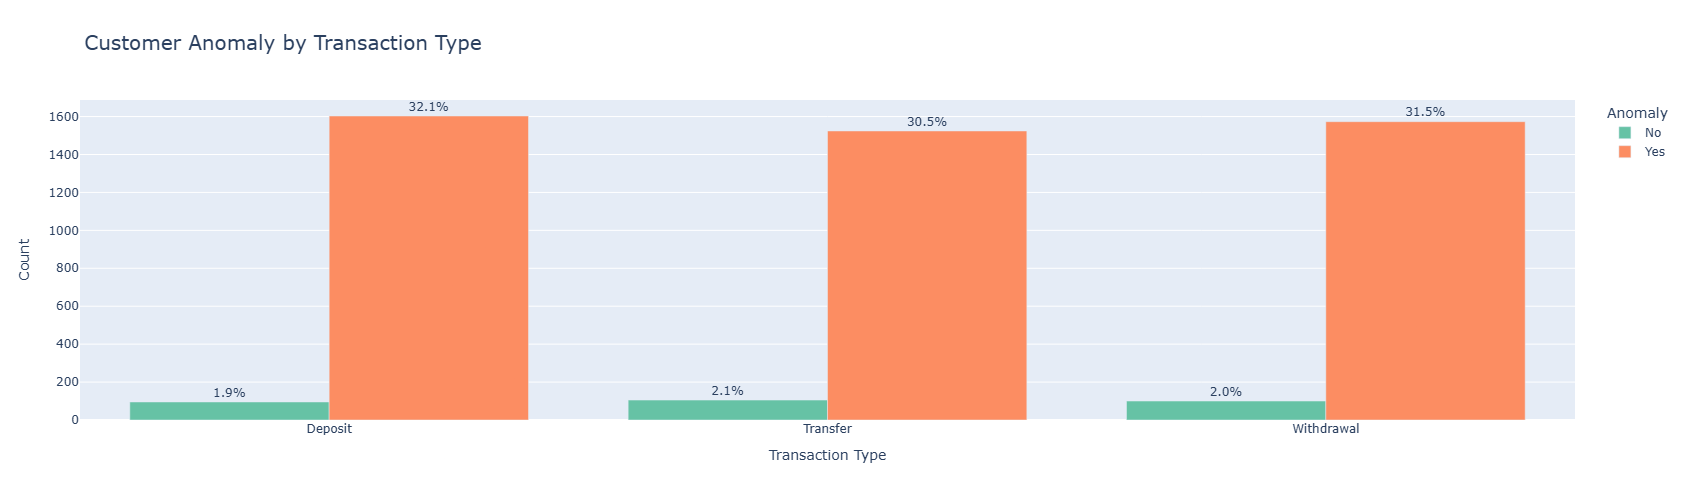

In [78]:
countplot('Transaction Type')

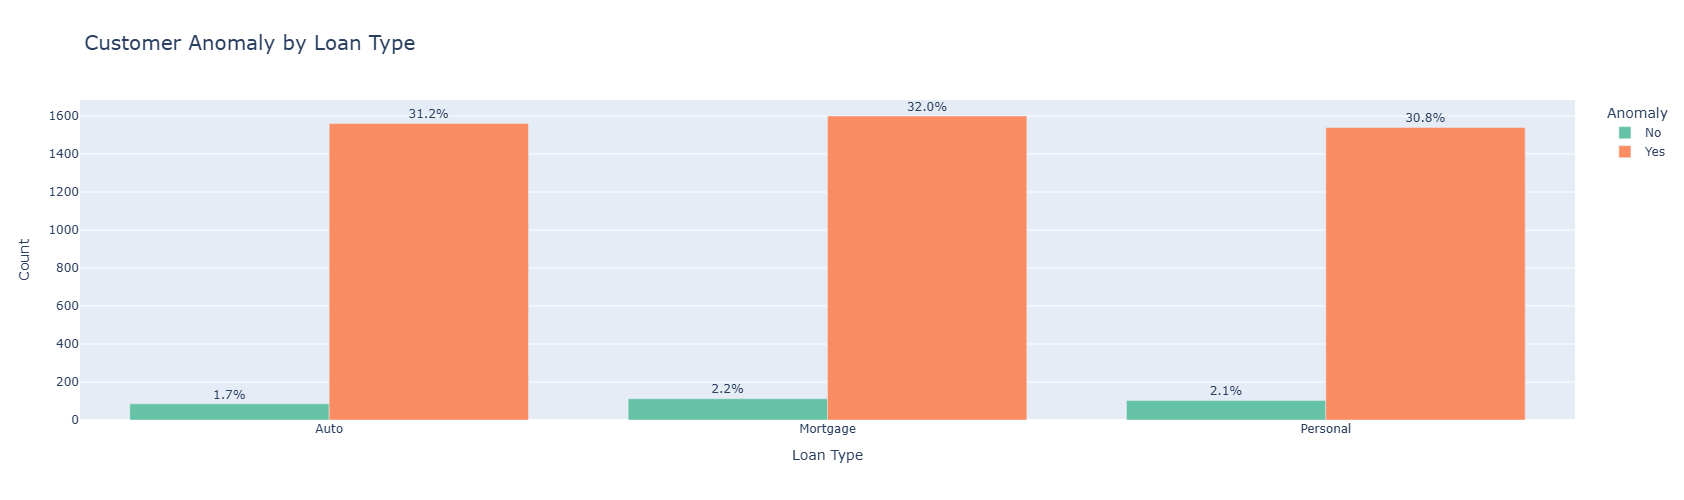

In [79]:
countplot('Loan Type')

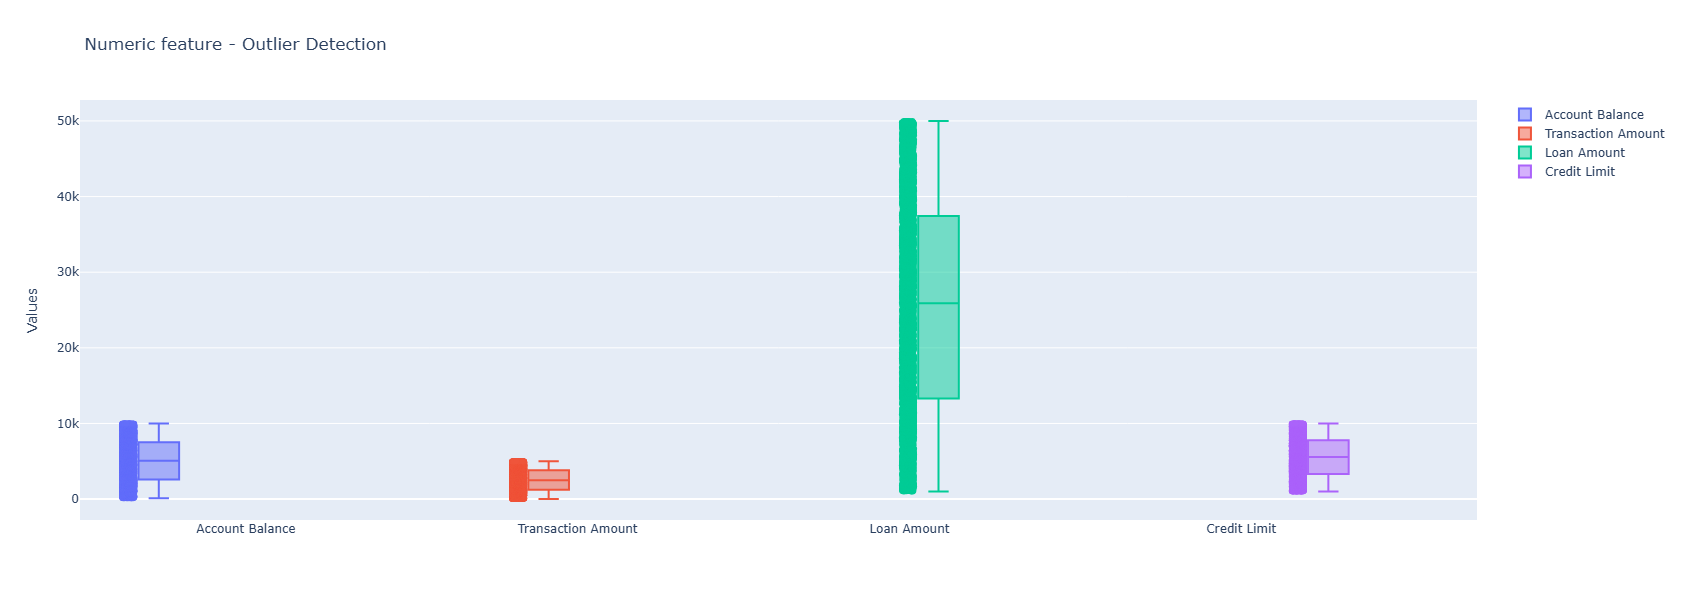

In [80]:
fig = go.Figure()

fig.add_trace(go.Box(y=data['Account Balance'], name='Account Balance',boxpoints='all',))
fig.add_trace(go.Box(y=data['Transaction Amount'], name='Transaction Amount',boxpoints='all'))
fig.add_trace(go.Box(y=data['Loan Amount'], name='Loan Amount',boxpoints='all'))
fig.add_trace(go.Box(y=data['Credit Limit'], name='Credit Limit',boxpoints='all'))


fig.update_layout(title='Numeric feature - Outlier Detection',
                  yaxis_title='Values',
                  boxmode='group',
                 
                  height = 600)

fig.show()

In [81]:
data[data['Anomaly'] == 'No']

,Customer ID,Age,Gender,City,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,Transaction Date,Transaction Type,...,Credit Card Balance,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
8,9,52,Male,Indianapolis,Current,1109.30,4/29/2012,11/5/2023,9/28/2023,Withdrawal,...,3227.18,161.36,11/28/2023,9/25/2023,4432,2/10/2023,Suggestion,Pending,7/12/2023,No
21,22,69,Female,San Antonio,Current,8846.74,1/1/2005,10/10/2023,7/1/2023,Transfer,...,53.50,2.68,9/23/2023,12/5/2023,4035,8/7/2023,Complaint,Pending,12/10/2023,No
50,51,61,Other,Nashville,Current,9123.83,9/7/2021,3/14/2023,8/25/2023,Withdrawal,...,4537.60,226.88,3/29/2023,4/2/2023,61,9/30/2023,Suggestion,Resolved,12/11/2023,No
59,60,28,Male,Seattle,Current,3457.40,8/22/2004,3/5/2023,6/14/2023,Withdrawal,...,4590.25,229.51,11/28/2023,7/9/2023,9195,4/8/2023,Praise,Resolved,12/16/2023,No
62,63,45,Male,Jacksonville,Savings,3300.96,12/15/2007,8/19/2023,11/15/2023,Transfer,...,177.97,8.90,11/12/2023,10/6/2023,130,12/25/2023,Praise,Pending,8/15/2023,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,37,Female,San Jose,Savings,6708.38,1/25/2012,11/24/2023,9/19/2023,Deposit,...,3696.42,184.82,11/20/2023,11/21/2023,5899,1/28/2023,Praise,Resolved,12/16/2023,No
4885,4886,25,Female,Baltimore,Current,5650.12,7/30/2010,12/24/2023,2/3/2023,Transfer,...,4047.75,202.39,11/4/2023,8/13/2023,6220,11/3/2023,Suggestion,Resolved,10/23/2023,No
4899,4900,45,Male,Mesa,Current,2938.68,12/22/2020,6/6/2023,3/18/2023,Transfer,...,2084.89,104.24,5/26/2023,1/28/2023,9539,11/23/2023,Complaint,Resolved,9/17/2023,No
4909,4910,39,Male,Houston,Current,6607.55,9/16/2013,8/31/2023,10/5/2023,Withdrawal,...,1596.11,79.81,6/9/2023,10/6/2023,388,7/4/2023,Complaint,Pending,6/11/2023,No


## Overview of dataset
* **as we finded this dataset is synthetic because...**
* it has some ideal values and same vlaues in anomaly
* it has only 50 unique first name & last name 
* it has not any single null value
* as per box plot we can see all has well distributed values and occurence of vlaue between uppere/lower fence so it clearly shows that it is synthetic data.

* **now we will visualize some kpi to learn graphs, pandas framework and plotly**

In [82]:
columns_info(data)

,Column,Unique Values,null values
0,Customer ID,5000,0
1,Age,52,0
2,Gender,3,0
3,City,40,0
4,Account Type,2,0
5,Account Balance,4991,0
6,Date Of Account Opening,3738,0
7,Last Transaction Date,365,0
8,Transaction Date,365,0
9,Transaction Type,3,0


In [83]:
data['Age'].describe()

count    5000.000000
mean       43.469800
std        15.145672
min        18.000000
25%        30.000000
50%        43.000000
75%        57.000000
max        69.000000
Name: Age, dtype: float64

#### Let's divide age into age group

In [84]:
bins = list(range(18, 71, 13))  
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

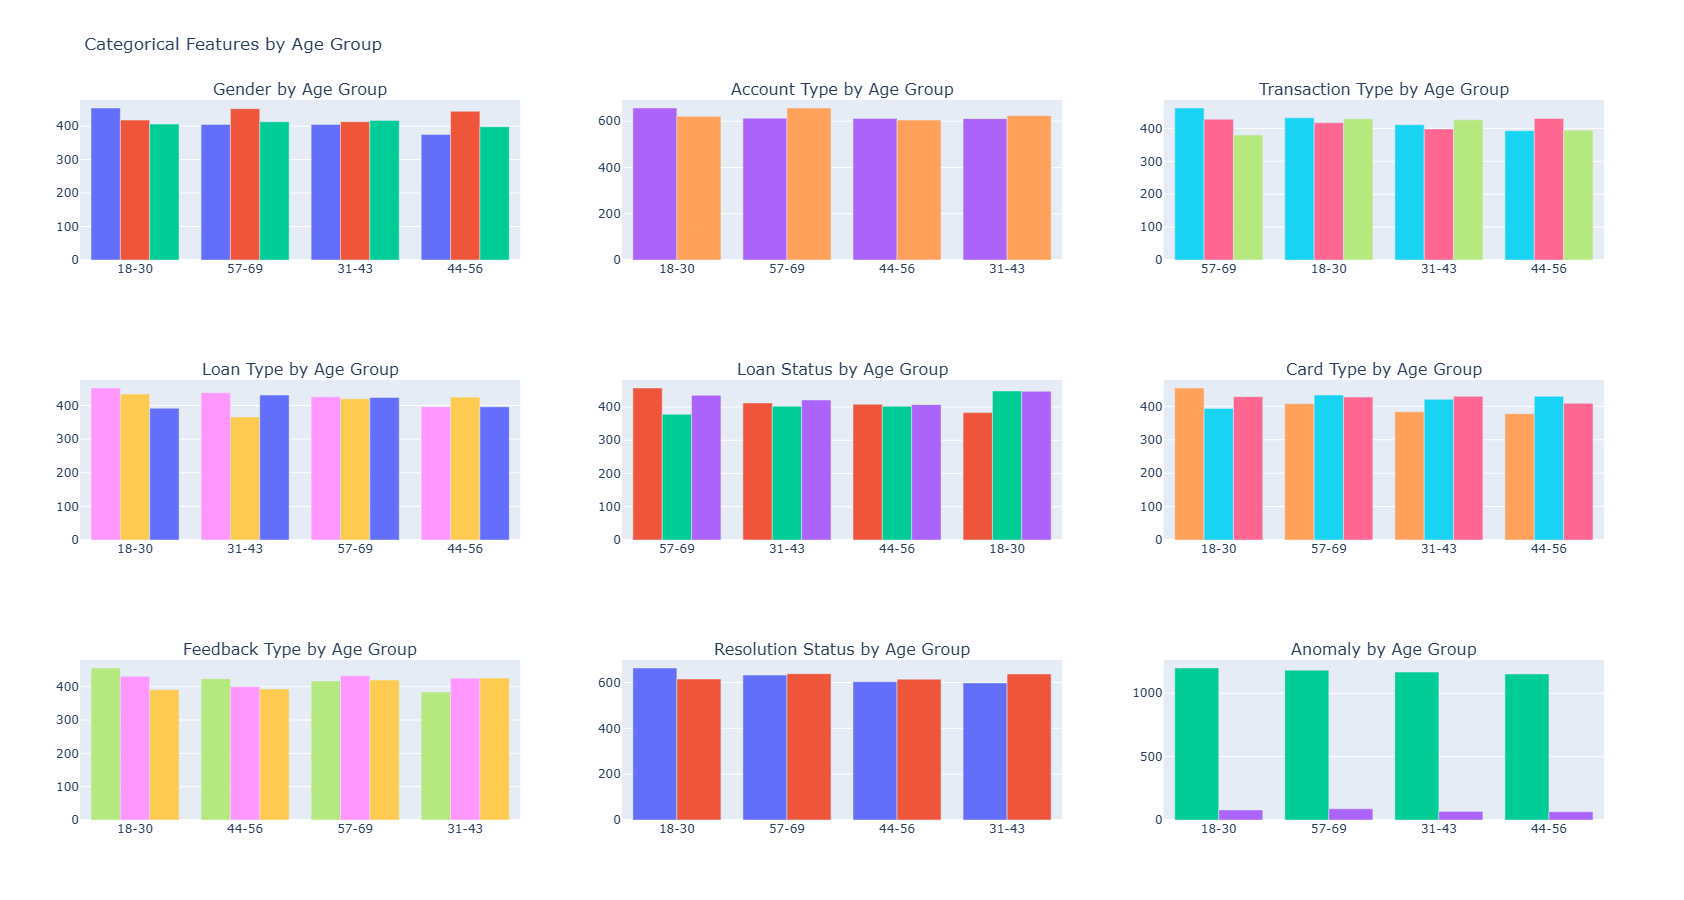

In [85]:
columns = [
    'Gender',
    'Account Type',
    'Transaction Type',
    'Loan Type',
    'Loan Status',
    'Card Type',
    'Feedback Type',
    'Resolution Status',
    'Anomaly'
]

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols 

fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=[f"{col} by Age Group" for col in columns])

for i, col in enumerate(columns):
   
    grouped = data.groupby(['age_group', col], observed=True).size().reset_index(name='Count')
    
    grouped = grouped.sort_values('Count', ascending=False)

    for val in grouped[col].unique():
        subset = grouped[grouped[col] == val]
        fig.add_trace(
            go.Bar(
                x=subset['age_group'],
                y=subset['Count'],
                name=str(val),
                showlegend=(i == 0)  
            ),
            row=(i // n_cols) + 1,
            col=(i % n_cols) + 1
        )
fig.update_layout(
    height=300 * n_rows,
    width=1400,
    title_text="Categorical Features by Age Group",
    barmode='group',
    showlegend = False
)

fig.show()


* **Based on the above observations, age group does not appear to significantly influence any of the categorical features.**

In [86]:
data['Date Of Account Opening'].max()

'9/9/2022'

In [87]:
data['Date Of Account Opening'] = pd.to_datetime(data['Date Of Account Opening'], format='%m/%d/%Y')
    
data['Date Of Account Opening'].dtype # it should 'ns'

dtype('<M8[ns]')

In [88]:
data['Year'] = data['Date Of Account Opening'].dt.year
data['Month'] = data['Date Of Account Opening'].dt.month_name()  # e.g., January
data['Year-Month'] = data['Date Of Account Opening'].dt.strftime('%Y-%b')
data['YearMonth'] = pd.to_datetime(data['Year-Month'], format='%Y-%b')

In [89]:
data['customer_tenure'] = 2022 - data['Year']

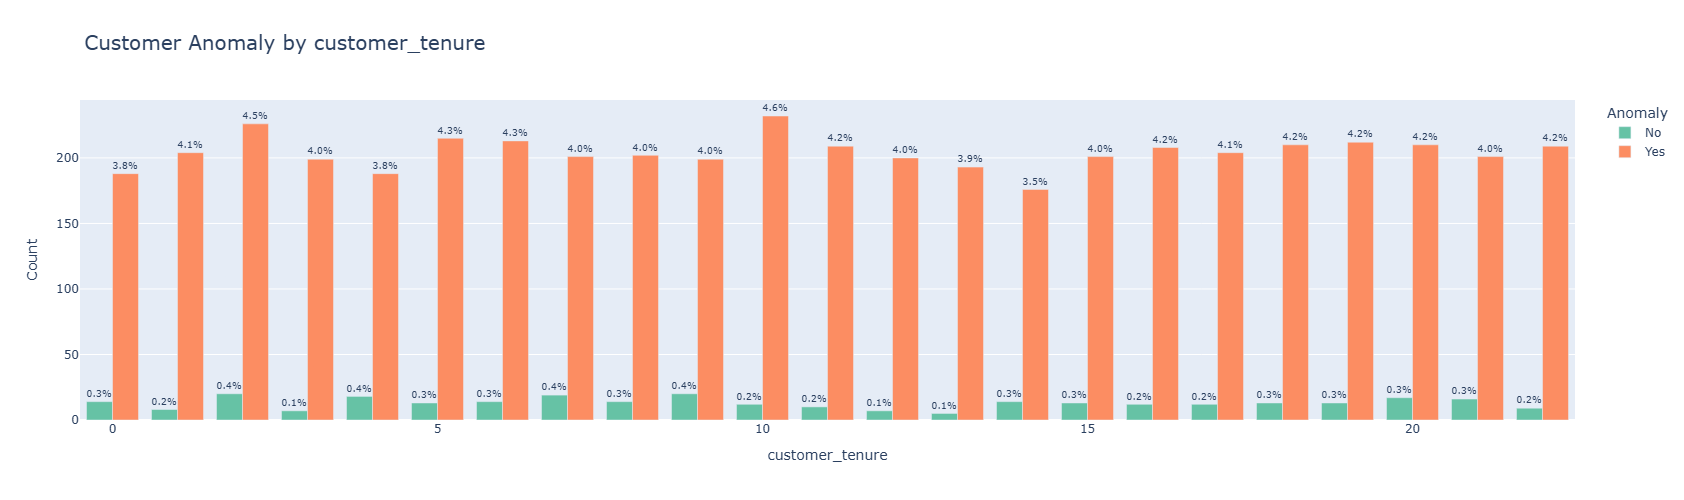

In [90]:
countplot('customer_tenure')

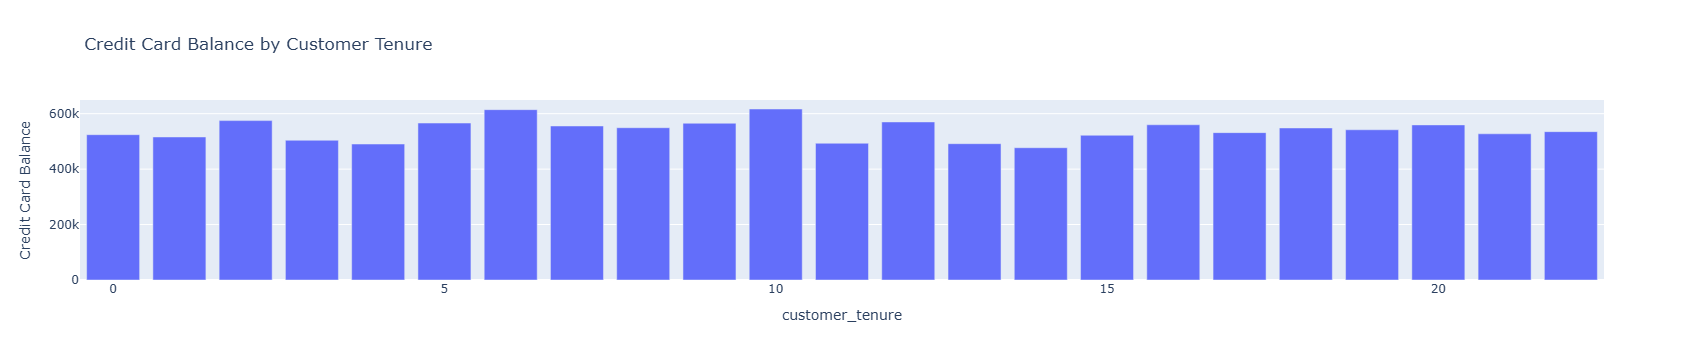

In [91]:
grouped_tenure = data.groupby('customer_tenure', observed=True)['Credit Card Balance'].sum().reset_index()
grouped_tenure = grouped_tenure.sort_values('Credit Card Balance', ascending=False)

fig = px.bar(grouped_tenure, x='customer_tenure', y='Credit Card Balance',
             title='Credit Card Balance by Customer Tenure')
fig.show()

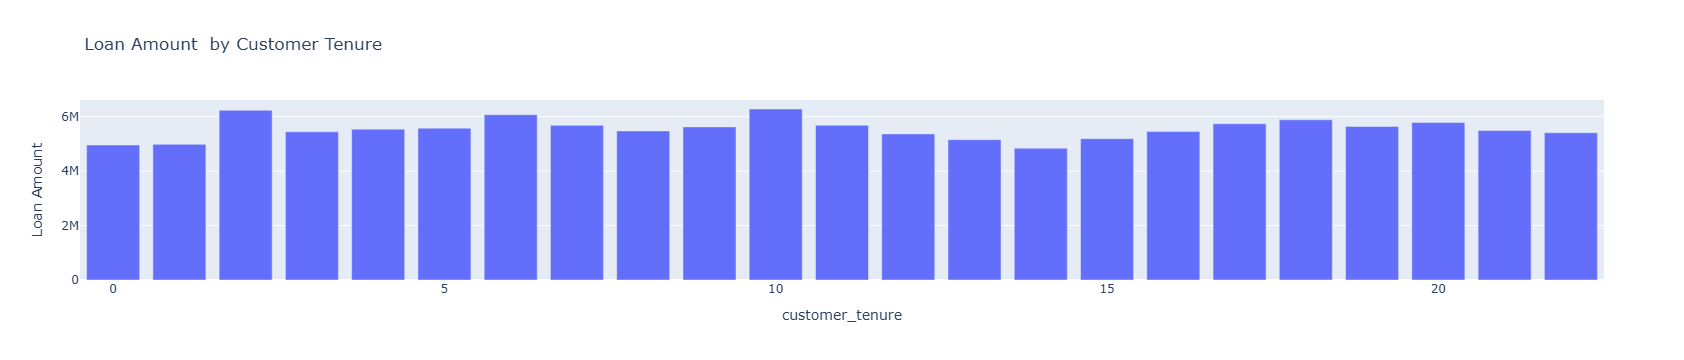

In [92]:

grouped_tenure = data.groupby('customer_tenure', observed=True)['Loan Amount'].sum().reset_index()
grouped_tenure = grouped_tenure.sort_values('Loan Amount', ascending=False)

fig = px.bar(grouped_tenure, x='customer_tenure', y='Loan Amount',
             title='Loan Amount	 by Customer Tenure')
fig.show()

In [93]:
columns_info(data)

,Column,Unique Values,null values
0,Customer ID,5000,0
1,Age,52,0
2,Gender,3,0
3,City,40,0
4,Account Type,2,0
5,Account Balance,4991,0
6,Date Of Account Opening,3738,0
7,Last Transaction Date,365,0
8,Transaction Date,365,0
9,Transaction Type,3,0


In [94]:
data['Feedback Date'] = pd.to_datetime(data['Feedback Date'], format='%m/%d/%Y')
    
data['Feedback Date'].dtype # it should 'ns'

dtype('<M8[ns]')

In [95]:
data['Year'] = data['Feedback Date'].dt.year
data['Month'] = data['Feedback Date'].dt.month_name()  # e.g., January
data['Year-Month'] = data['Feedback Date'].dt.strftime('%Y-%b')
data['YearMonth'] = pd.to_datetime(data['Year-Month'], format='%Y-%b')

In [96]:
data['Resolution Date'] = pd.to_datetime(data['Resolution Date'], format='%m/%d/%Y')
data['Resolution Date'].dtype # it should 'ns'


data['Year'] = data['Resolution Date'].dt.year
data['Month'] = data['Resolution Date'].dt.month_name()  # e.g., January
data['Year-Month'] = data['Resolution Date'].dt.strftime('%Y-%b')
data['YearMonth'] = pd.to_datetime(data['Year-Month'], format='%Y-%b')

In [97]:
data['feedback_resolution_time']  =  data['Resolution Date']-data['Feedback Date']

########  as this is synthetic data so here feedback and resolution date is miss matched so we convert days into absolute positive.

data['feedback_resolution_time'] = data['feedback_resolution_time'].abs().dt.days  

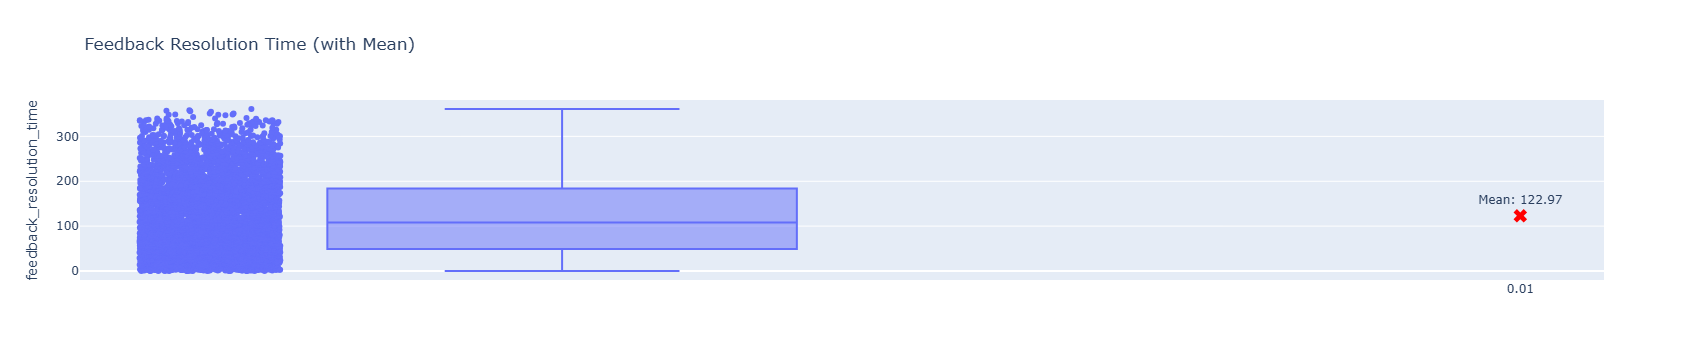

In [98]:
fig = px.box(data, y="feedback_resolution_time", points='all', title="Feedback Resolution Time (with Mean)")
avg = data['feedback_resolution_time'].mean()

fig.add_trace(
    go.Scatter(
        x=[0.01],  
        y=[avg],
        mode='markers+text',
        marker=dict(color='red', symbol='x', size=12),
        name='Mean',
        text=[f"Mean: {avg:.2f}"],
        textposition='top center',
        showlegend=False
    )
)

fig.show()
